# MICRO-CREDIT DEFAULTER MODEL

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from statsmodels.stats.outliers_influence import variance_inflation_factor

## Data Exploration and Preprocessing

In [2]:
# To display all the columns present in the dataset
pd.set_option('display.max_columns',None)

In [3]:
df=pd.read_csv("credit_data.csv")
df.head()

Unnamed: 0  label       msisdn    aon  daily_decr30  daily_decr90  \
0           1      0  21408I70789  272.0   3055.050000   3065.150000   
1           2      1  76462I70374  712.0  12122.000000  12124.750000   
2           3      1  17943I70372  535.0   1398.000000   1398.000000   
3           4      1  55773I70781  241.0     21.228000     21.228000   
4           5      1  03813I82730  947.0    150.619333    150.619333   

   rental30  rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  \
0    220.13    260.13                2.0                0.0              1539   
1   3691.26   3691.26               20.0                0.0              5787   
2    900.13    900.13                3.0                0.0              1539   
3    159.42    159.42               41.0                0.0               947   
4   1098.90   1098.90                4.0                0.0              2309   

   cnt_ma_rech30  fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0              2          21.0             3078.0                1539.0   
1              1           0.0             5787.0                5787.0   
2              1           0.0             1539.0                1539.0   
3              0           0.0                0.0                   0.0   
4              7           2.0            20029.0                2309.0   

   medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                  7.50              2            21               3078   
1                 61.04              1             0               5787   
2                 66.32              1             0               1539   
3                  0.00              1             0                947   
4                 29.00              8             2              23496   

   medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  fr_da_rech30  \
0                1539.0                  7.50            0.0           0.0   
1                5787.0                 61.04            0.0           0.0   
2                1539.0                 66.32            0.0           0.0   
3                 947.0                  2.50            0.0           0.0   
4                2888.0                 35.00            0.0           0.0   

   cnt_da_rech90  fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0              0             0            2            12              6.0   
1              0             0            1            12             12.0   
2              0             0            1             6              6.0   
3              0             0            2            12              6.0   
4              0             0            7            42              6.0   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 0.0          2.0            12                6   
1                 0.0          1.0            12               12   
2                 0.0          1.0             6                6   
3                 0.0          2.0            12                6   
4                 0.0          7.0            42                6   

   medianamnt_loans90  payback30  payback90 pcircle       pdate  
0                 0.0  29.000000  29.000000     UPW  2016-07-20  
1                 0.0   0.000000   0.000000     UPW  2016-08-10  
2                 0.0   0.000000   0.000000     UPW  2016-08-19  
3                 0.0   0.000000   0.000000     UPW  2016-06-06  
4                 0.0   2.333333   2.333333     UPW  2016-06-22

#### Our task is to predict whether the customer is a Defaulter(0) or Non-Defaulter(1).

In [4]:
# checking the number of rows and columns in the dataset
df.shape

(209593, 37)

- In our dataset we have 209593 rows and 37 columns including our target variable "label".

In [5]:
# Getting some informations about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

- We have total 37 columns out of which 3 have object values, 13 have integer values and 21 have float values.

In [6]:
# checking the count of unique values for each column in the dataset
df.nunique()

Unnamed: 0              209593
label                        2
msisdn                  186243
aon                       4507
daily_decr30            147026
daily_decr90            158670
rental30                132148
rental90                141033
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     30428
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     29785
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianam

- Here we observe that "Unnamed: 0" column has 209593 unique values which is same as the count of entries. This column has no meaningful information and we can delete it.

In [7]:
# Dropping unwanted columns
df.drop(['Unnamed: 0','msisdn','pcircle'],axis=1,inplace=True)

In [8]:
# Type casting the pdate feature to datetime
df["pdate"]=pd.to_datetime(df["pdate"])

In [9]:
# Extracting year and month from date
df['year'] = df['pdate'].dt.year
df['month'] = df['pdate'].dt.month

In [10]:
df.head()

label    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  272.0   3055.050000   3065.150000    220.13    260.13   
1      1  712.0  12122.000000  12124.750000   3691.26   3691.26   
2      1  535.0   1398.000000   1398.000000    900.13    900.13   
3      1  241.0     21.228000     21.228000    159.42    159.42   
4      1  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                2.0                0.0              1539              2   
1               20.0                0.0              5787              1   
2                3.0                0.0              1539              1   
3               41.0                0.0               947              0   
4                4.0                0.0              2309              7   

   fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0          21.0             3078.0                1539.0   
1           0.0             5787.0                5787.0   
2           0.0             1539.0                1539.0   
3           0.0                0.0                   0.0   
4           2.0            20029.0                2309.0   

   medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                  7.50              2            21               3078   
1                 61.04              1             0               5787   
2                 66.32              1             0               1539   
3                  0.00              1             0                947   
4                 29.00              8             2              23496   

   medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  fr_da_rech30  \
0                1539.0                  7.50            0.0           0.0   
1                5787.0                 61.04            0.0           0.0   
2                1539.0                 66.32            0.0           0.0   
3                 947.0                  2.50            0.0           0.0   
4                2888.0                 35.00            0.0           0.0   

   cnt_da_rech90  fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0              0             0            2            12              6.0   
1              0             0            1            12             12.0   
2              0             0            1             6              6.0   
3              0             0            2            12              6.0   
4              0             0            7            42              6.0   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 0.0          2.0            12                6   
1                 0.0          1.0            12               12   
2                 0.0          1.0             6                6   
3                 0.0          2.0            12                6   
4                 0.0          7.0            42                6   

   medianamnt_loans90  payback30  payback90      pdate  year  month  
0                 0.0  29.000000  29.000000 2016-07-20  2016      7  
1                 0.0   0.000000   0.000000 2016-08-10  2016      8  
2                 0.0   0.000000   0.000000 2016-08-19  2016      8  
3                 0.0   0.000000   0.000000 2016-06-06  2016      6  
4                 0.0   2.333333   2.333333 2016-06-22  2016      6

In [11]:
# Dropping pdate as we have extracted year and month, deleting year as it has only one value.
df.drop(['pdate','year'],axis=1,inplace=True)

In [12]:
# checking the missing value counts for each column
df.isnull().sum()

label                   0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
month                   0
dtype: int64

- There are no missing values in our dataset.  

<AxesSubplot:>

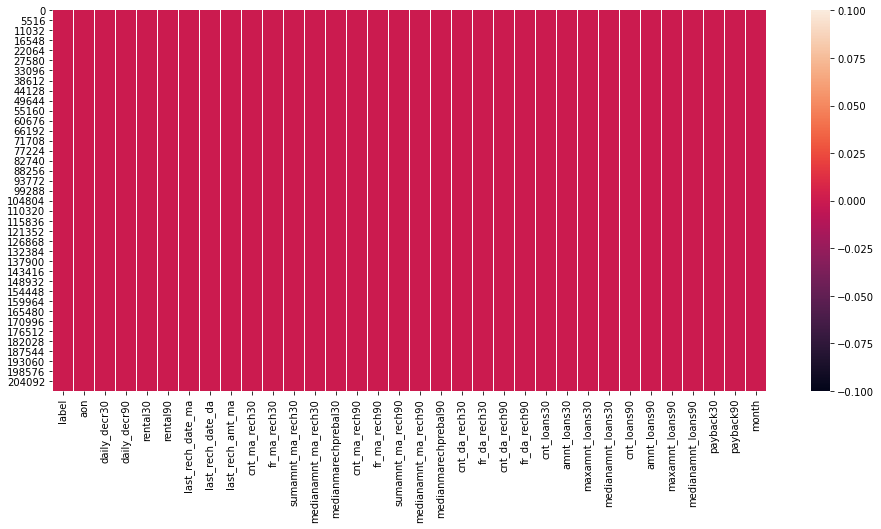

In [13]:
#plotting heatmap to view the missing values
plt.figure(figsize=(16,7))
sns.heatmap(df.isnull())

- This shows that there are no missing values in our dataset.

In [14]:
# statistical information
df.describe()

label            aon   daily_decr30   daily_decr90  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean        0.875177    8112.343445    5381.402289    6082.515068   
std         0.330519   75696.082531    9220.623400   10918.812767   
min         0.000000     -48.000000     -93.012667     -93.012667   
25%         1.000000     246.000000      42.440000      42.692000   
50%         1.000000     527.000000    1469.175667    1500.000000   
75%         1.000000     982.000000    7244.000000    7802.790000   
max         1.000000  999860.755168  265926.000000  320630.000000   

            rental30       rental90  last_rech_date_ma  last_rech_date_da  \
count  209593.000000  209593.000000      209593.000000      209593.000000   
mean     2692.581910    3483.406534        3755.847800        3712.202921   
std      4308.586781    5770.461279       53905.892230       53374.833430   
min    -23737.140000  -24720.580000         -29.000000         -29.000000   
25%       280.420000     300.260000           1.000000           0.000000   
50%      1083.570000    1334.000000           3.000000           0.000000   
75%      3356.940000    4201.790000           7.000000           0.000000   
max    198926.110000  200148.110000      998650.377733      999171.809410   

       last_rech_amt_ma  cnt_ma_rech30   fr_ma_rech30  sumamnt_ma_rech30  \
count     209593.000000  209593.000000  209593.000000      209593.000000   
mean        2064.452797       3.978057    3737.355121        7704.501157   
std         2370.786034       4.256090   53643.625172       10139.621714   
min            0.000000       0.000000       0.000000           0.000000   
25%          770.000000       1.000000       0.000000        1540.000000   
50%         1539.000000       3.000000       2.000000        4628.000000   
75%         2309.000000       5.000000       6.000000       10010.000000   
max        55000.000000     203.000000  999606.368132      810096.000000   

       medianamnt_ma_rech30  medianmarechprebal30  cnt_ma_rech90  \
count         209593.000000         209593.000000   209593.00000   
mean            1812.817952           3851.927942        6.31543   
std             2070.864620          54006.374433        7.19347   
min                0.000000           -200.000000        0.00000   
25%              770.000000             11.000000        2.00000   
50%             1539.000000             33.900000        4.00000   
75%             1924.000000             83.000000        8.00000   
max            55000.000000         999479.419319      336.00000   

        fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  \
count  209593.000000      209593.000000         209593.000000   
mean        7.716780       12396.218352           1864.595821   
std        12.590251       16857.793882           2081.680664   
min         0.000000           0.000000              0.000000   
25%         0.000000        2317.000000            773.000000   
50%         2.000000        7226.000000           1539.000000   
75%         8.000000       16000.000000           1924.000000   
max        88.000000      953036.000000          55000.000000   

       medianmarechprebal90  cnt_da_rech30   fr_da_rech30  cnt_da_rech90  \
count         209593.000000  209593.000000  209593.000000  209593.000000   
mean              92.025541     262.578110    3749.494447       0.041495   
std              369.215658    4183.897978   53885.414979       0.397556   
min             -200.000000       0.000000       0.000000       0.000000   
25%               14.600000       0.000000       0.000000       0.000000   
50%               36.000000       0.000000       0.000000       0.000000   
75%               79.310000       0.000000       0.000000       0.000000   
max            41456.500000   99914.441420  999809.240107      38.000000   

        fr_da_rech90    cnt_loans30   amnt_loans30  maxamnt_loans30  \
count  209593.000000  209593.000000  209593.000000    20959

#### Observations:
- Since the count is same for all the columns, that means there are no null values.
- For majority of the columns there is a large difference between mean and median values that means the distribution is not normal.
- There is a large difference between 75th percentile and max values for many features which means there are outliers present.

## Exploratory Data Analysis

In [15]:
# Chrecking count of categories for target variable
df["label"].value_counts()

1    183431
0     26162
Name: label, dtype: int64

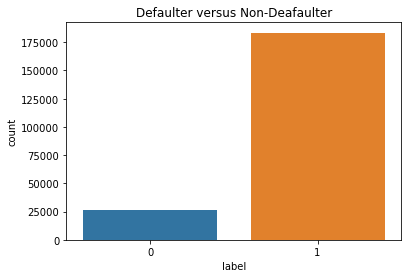

In [16]:
sns.countplot(x='label',data=df)
plt.title("Defaulter versus Non-Deafaulter")
plt.show()

- From the above countplot we can say that our dataset is imbalanced. We have majority of Non-Defaulter entries. 

#### Numerical variables

In [17]:
# List of numerical features
numerical_features=[feature for feature in df.columns if df[feature].dtypes !="O"]

print("Number of numerical features:",len(numerical_features))

# viewing the numerical variables
df[numerical_features].head()

Number of numerical features: 34


label    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  272.0   3055.050000   3065.150000    220.13    260.13   
1      1  712.0  12122.000000  12124.750000   3691.26   3691.26   
2      1  535.0   1398.000000   1398.000000    900.13    900.13   
3      1  241.0     21.228000     21.228000    159.42    159.42   
4      1  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                2.0                0.0              1539              2   
1               20.0                0.0              5787              1   
2                3.0                0.0              1539              1   
3               41.0                0.0               947              0   
4                4.0                0.0              2309              7   

   fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0          21.0             3078.0                1539.0   
1           0.0             5787.0                5787.0   
2           0.0             1539.0                1539.0   
3           0.0                0.0                   0.0   
4           2.0            20029.0                2309.0   

   medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                  7.50              2            21               3078   
1                 61.04              1             0               5787   
2                 66.32              1             0               1539   
3                  0.00              1             0                947   
4                 29.00              8             2              23496   

   medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  fr_da_rech30  \
0                1539.0                  7.50            0.0           0.0   
1                5787.0                 61.04            0.0           0.0   
2                1539.0                 66.32            0.0           0.0   
3                 947.0                  2.50            0.0           0.0   
4                2888.0                 35.00            0.0           0.0   

   cnt_da_rech90  fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0              0             0            2            12              6.0   
1              0             0            1            12             12.0   
2              0             0            1             6              6.0   
3              0             0            2            12              6.0   
4              0             0            7            42              6.0   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 0.0          2.0            12                6   
1                 0.0          1.0            12               12   
2                 0.0          1.0             6                6   
3                 0.0          2.0            12                6   
4                 0.0          7.0            42                6   

   medianamnt_loans90  payback30  payback90  month  
0                 0.0  29.000000  29.000000      7  
1                 0.0   0.000000   0.000000      8  
2                 0.0   0.000000   0.000000      8  
3                 0.0   0.000000   0.000000      6  
4                 0.0   2.333333   2.333333      6

In [18]:
# Numerical variables are usually of two types:
# 1. Continuous variable and 2. Discrete variable
# considering 25 as the threshold value for each feature's unique values
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<7]

print("Discrete Variables Count:",len(discrete_feature))
discrete_feature

Discrete Variables Count: 5


['label',
 'medianamnt_loans30',
 'maxamnt_loans90',
 'medianamnt_loans90',
 'month']

<AxesSubplot:xlabel='medianamnt_loans30', ylabel='count'>

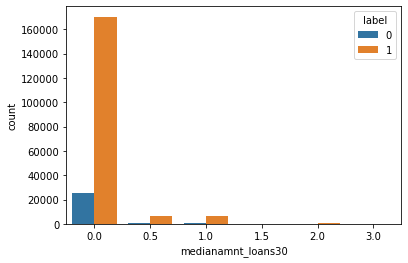

In [19]:
sns.countplot(x="medianamnt_loans30",hue="label",data=df)

<AxesSubplot:xlabel='maxamnt_loans90', ylabel='count'>

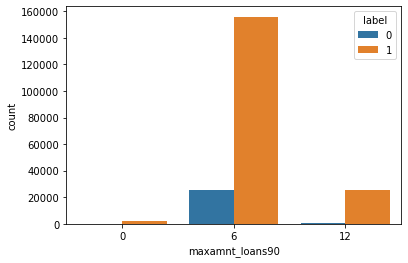

In [20]:
sns.countplot(x="maxamnt_loans90",hue="label",data=df)

<AxesSubplot:xlabel='medianamnt_loans90', ylabel='count'>

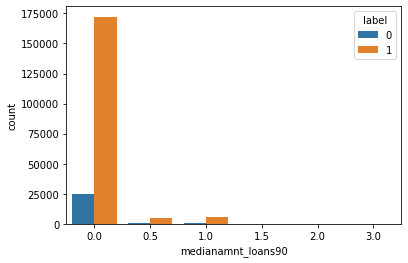

In [21]:
sns.countplot(x="medianamnt_loans90",hue="label",data=df)

<AxesSubplot:xlabel='month', ylabel='count'>

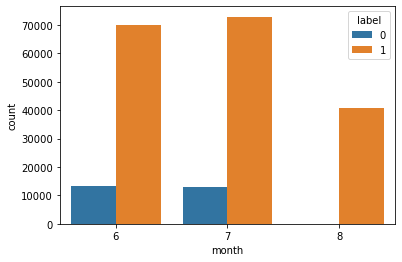

In [22]:
sns.countplot(x="month",hue="label",data=df)

#### Observations:
- From the above plots we can say that for the defaulters the median loan amount from 30 days and 90 days is zero.
- Majority of the defaulters are those whose maximum amount of loan taken by the user in last 90 days is 6. 
- There is no defaulter for the 8th month.

In [23]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]

print("Continuous Variable Count:",len(continuous_feature))

Continuous Variable Count: 29


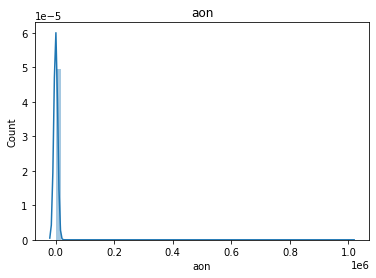

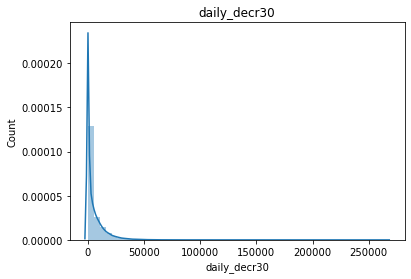

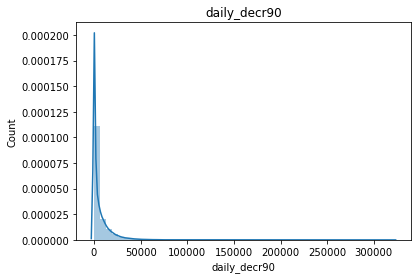

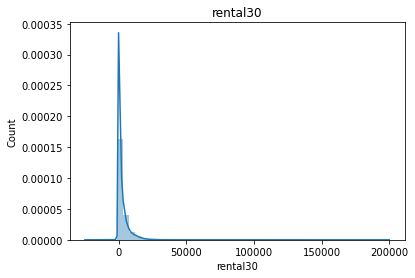

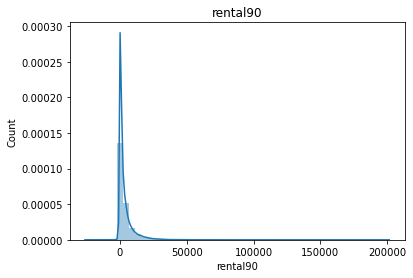

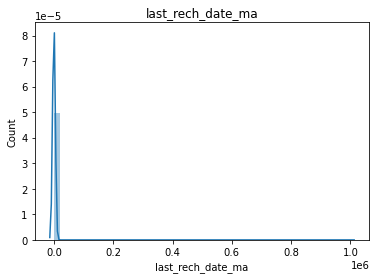

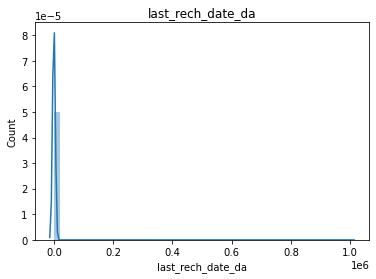

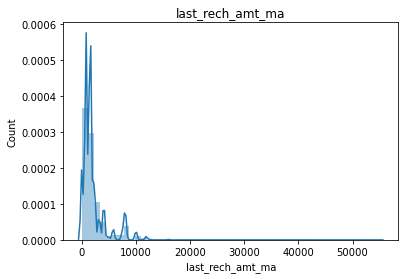

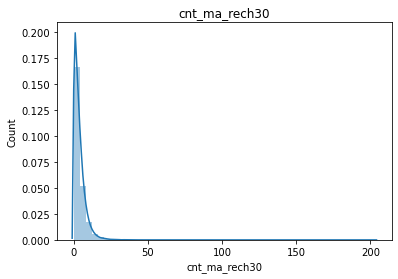

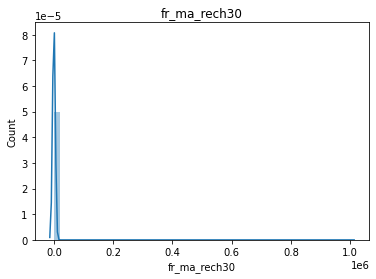

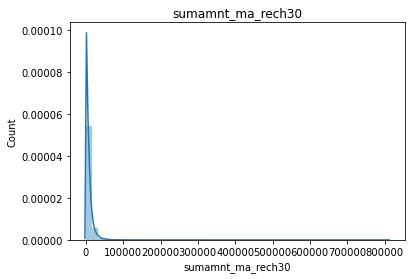

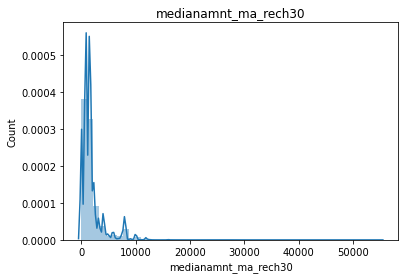

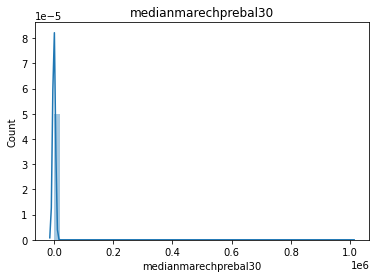

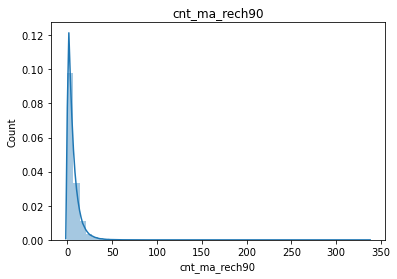

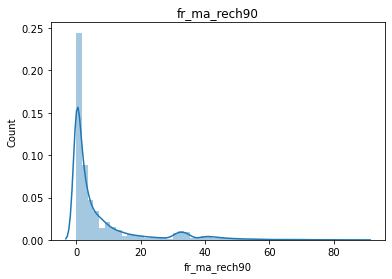

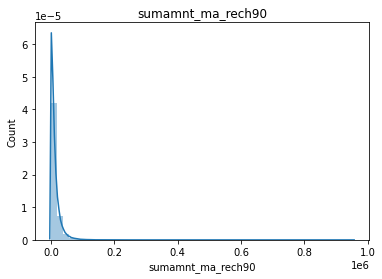

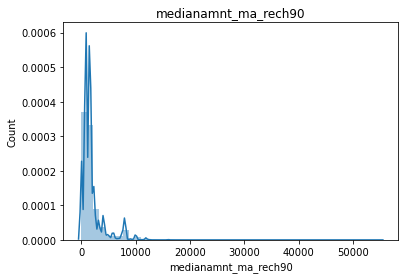

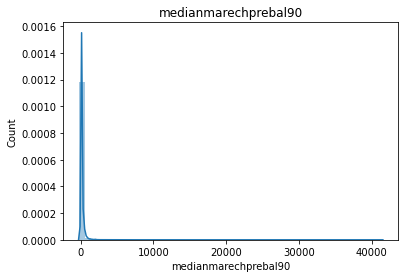

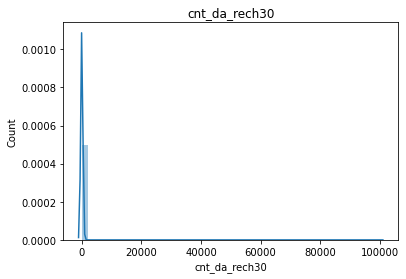

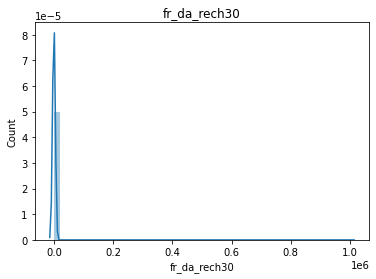

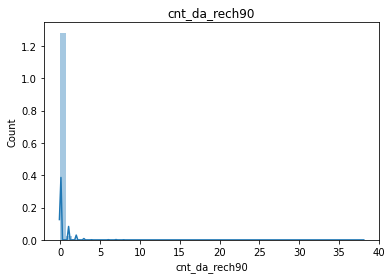

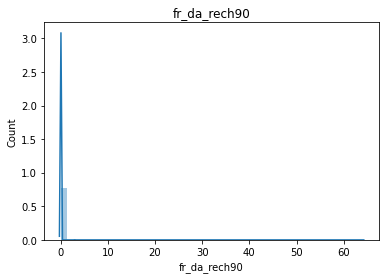

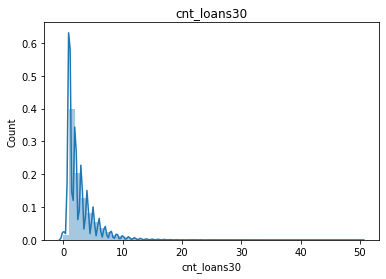

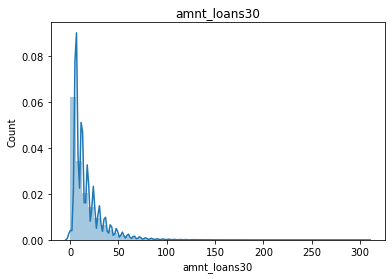

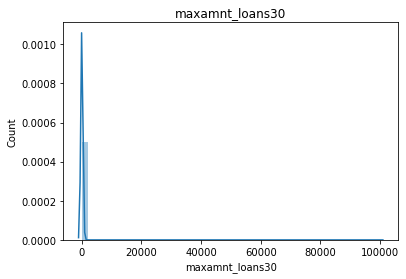

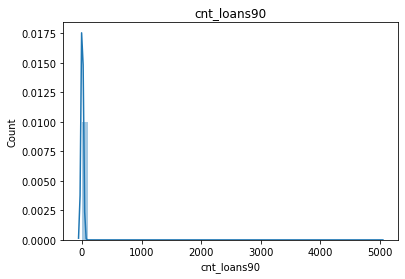

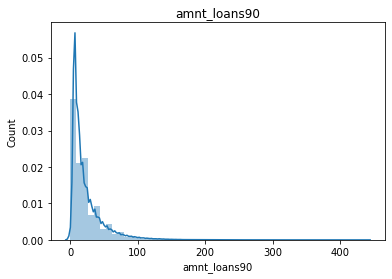

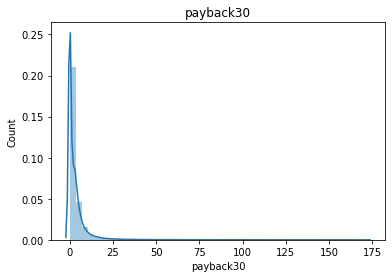

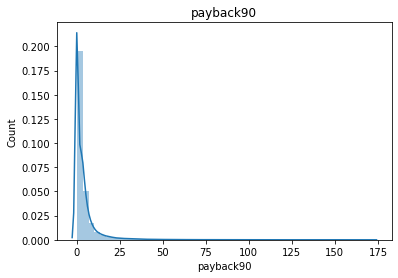

In [24]:
# Let's analyze the continuous variables by plotting distribution graph to understand the distribution
for feature in continuous_feature:
    data=df.copy()
    sns.distplot(data[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

#### Observations:
- From the above distribution plots we can conclude that all the continuous variables are not normally distributed and there is skewness for all these features.

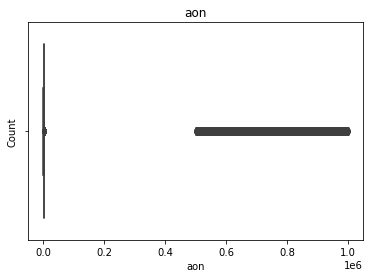

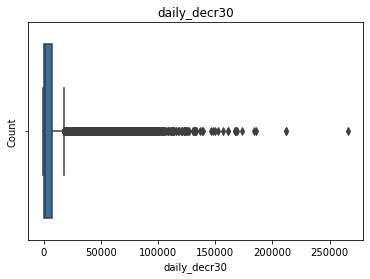

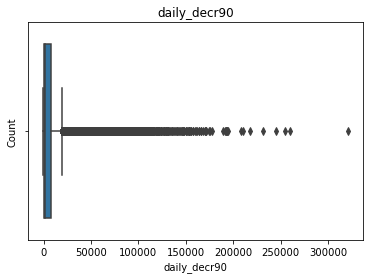

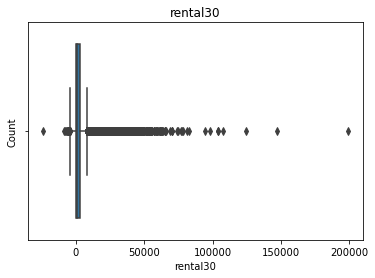

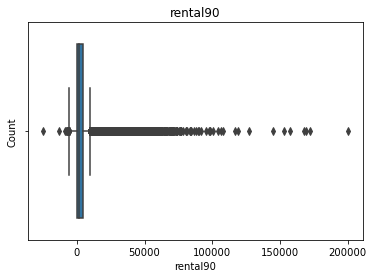

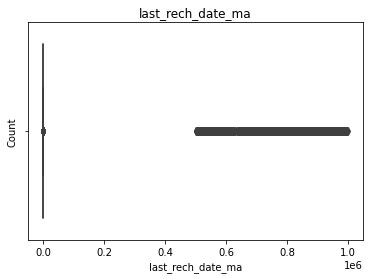

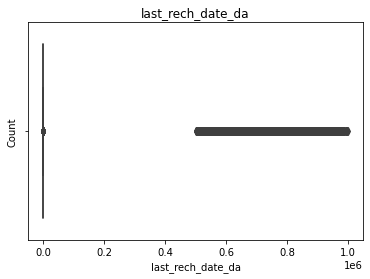

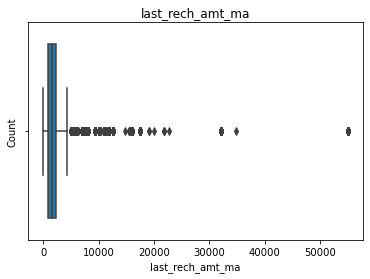

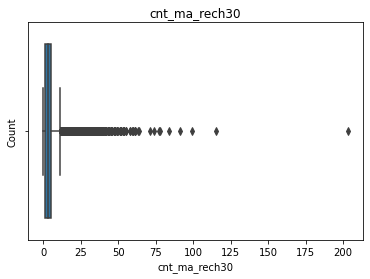

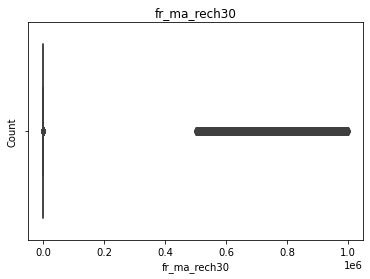

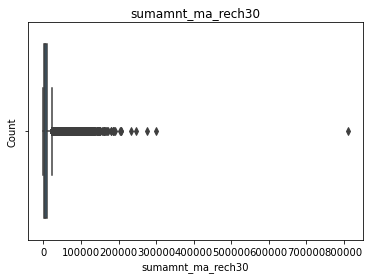

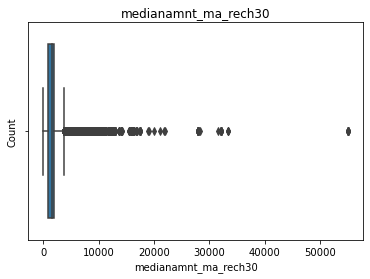

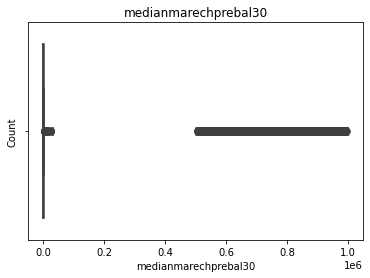

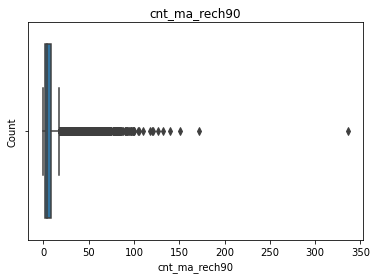

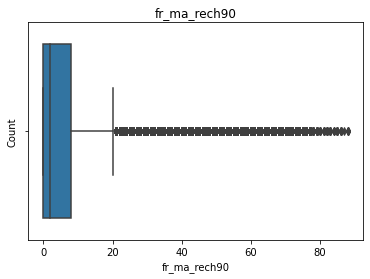

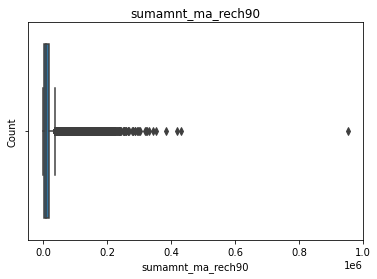

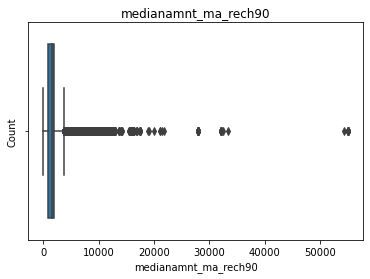

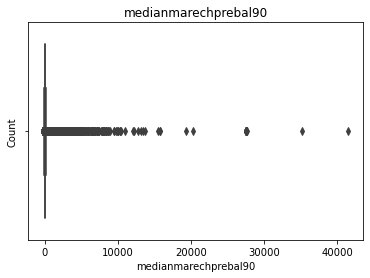

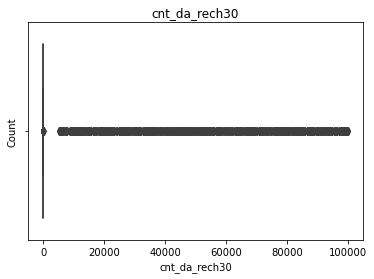

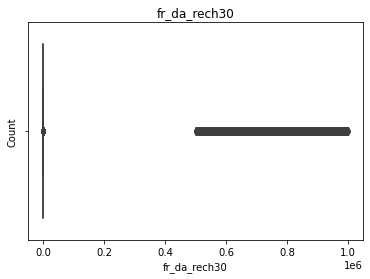

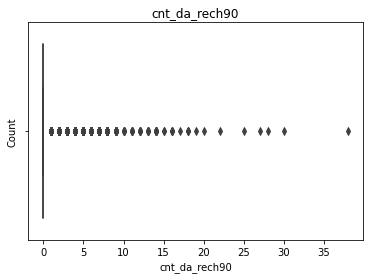

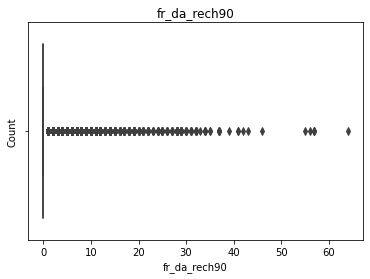

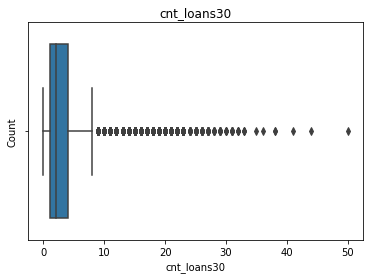

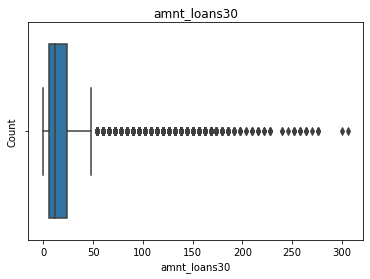

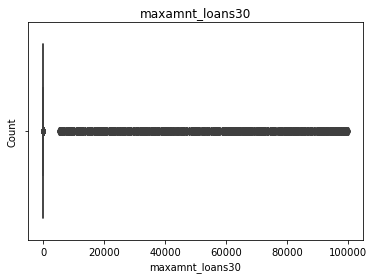

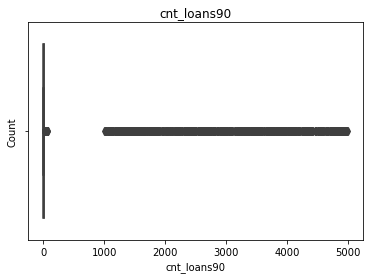

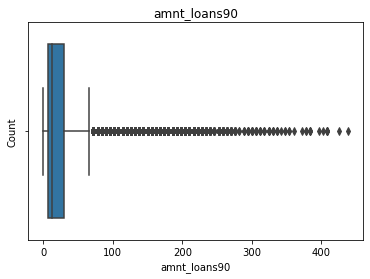

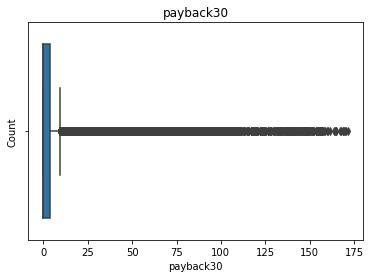

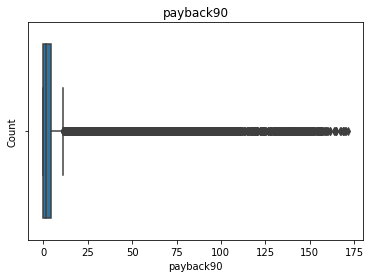

In [25]:
# Let's analyze the continuous variables by plotting distribution graph to understand the distribution
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

####  Observations:
- From the above boxplots we can say that almost all the continous variables are having outliers and we need to treat them.

#### Categorical Variables

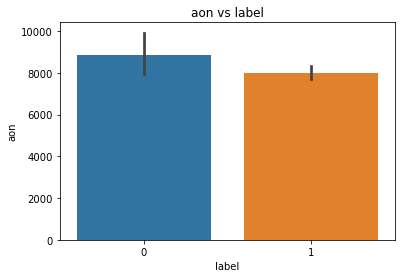

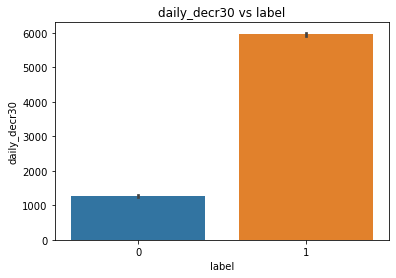

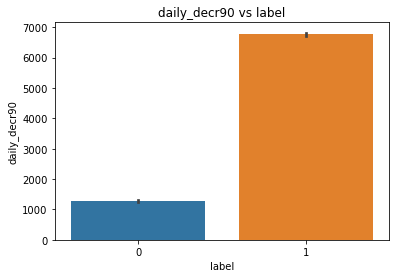

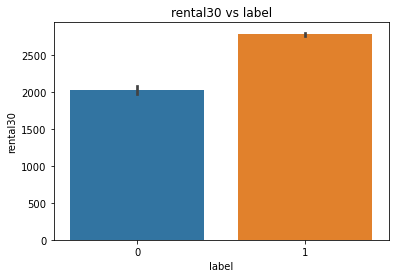

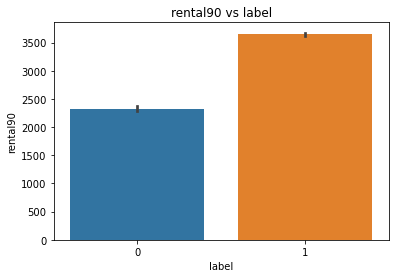

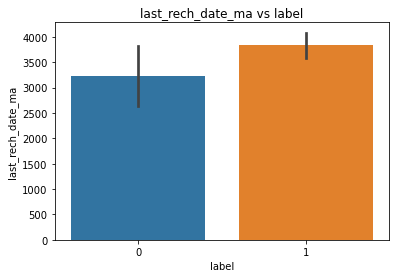

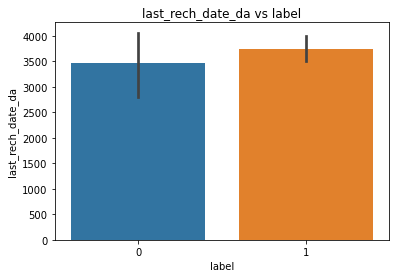

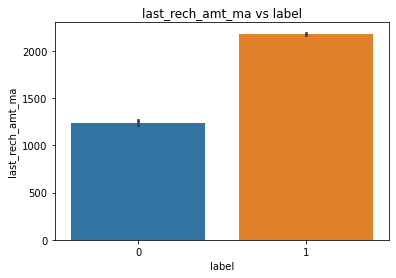

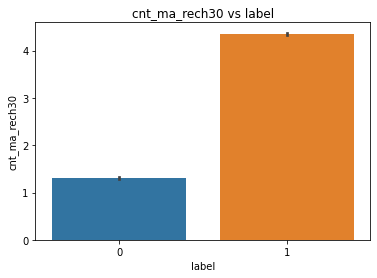

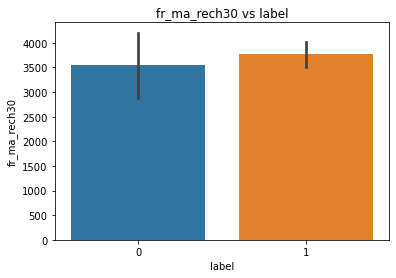

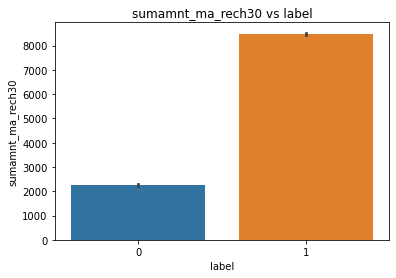

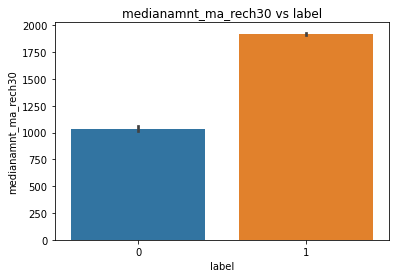

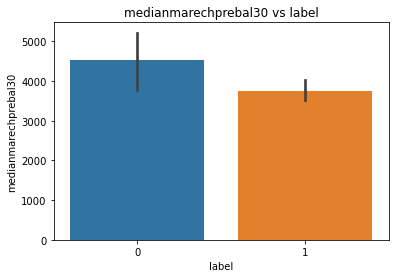

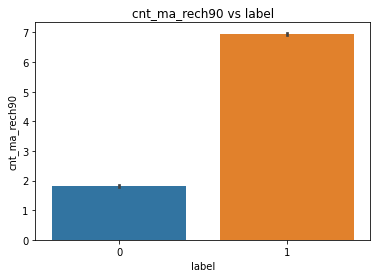

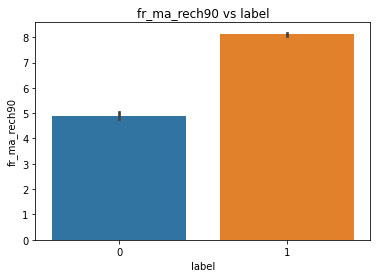

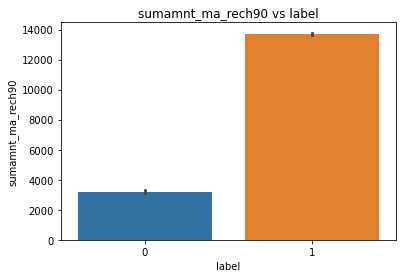

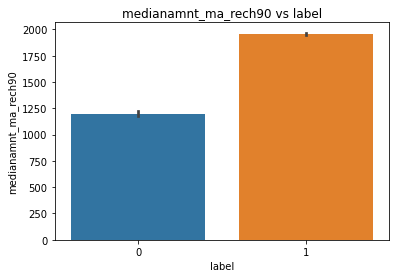

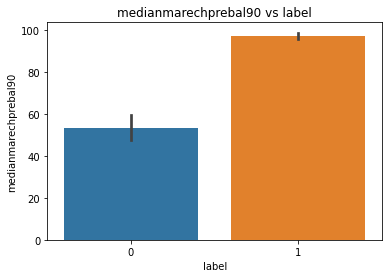

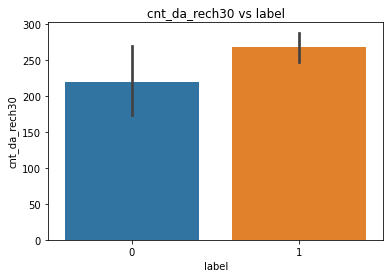

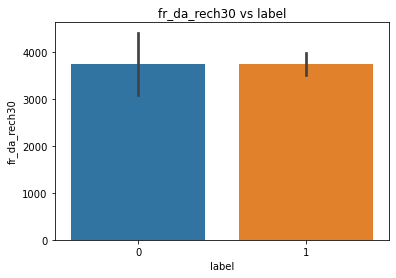

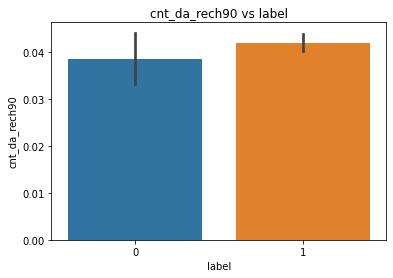

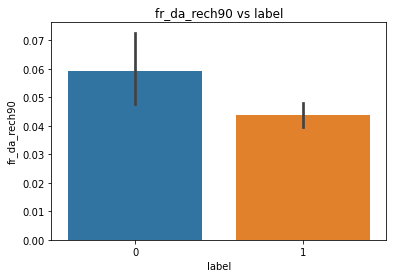

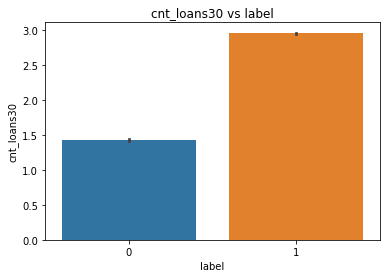

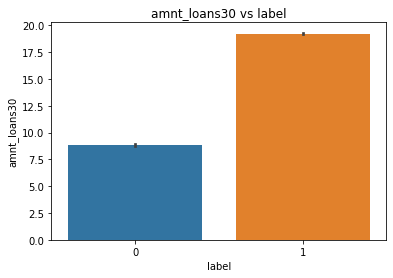

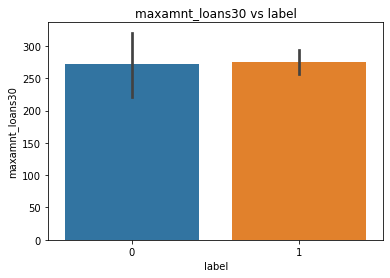

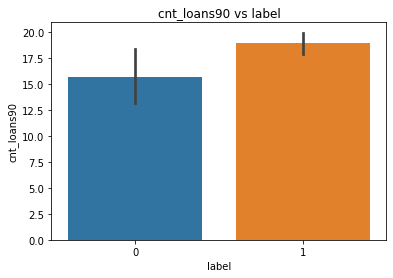

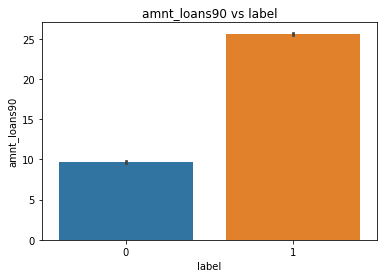

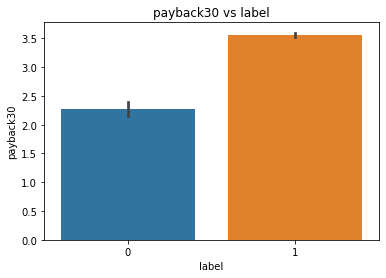

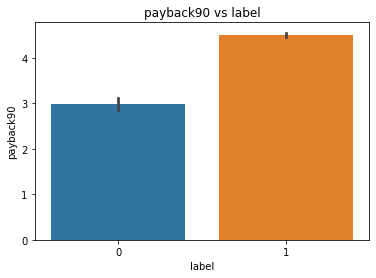

In [26]:
# Let's find out the relationship between all categorical variables and the target variable SalePrice

for feature in continuous_feature:
    data=df.copy()
    sns.barplot(x="label",y=feature,data=data)
    plt.xlabel("label")
    plt.ylabel(feature)
    plt.title(feature+" vs label")
    plt.show()

<AxesSubplot:xlabel='label', ylabel='aon'>

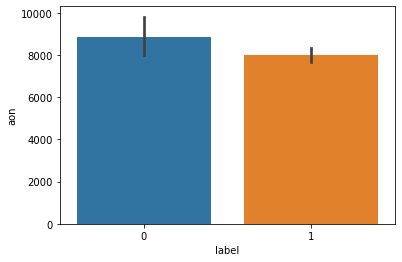

In [27]:
sns.barplot(x="label",y="aon",data=df)

#### Observations:
- For the Non-Defaulters, the average daily amount spent from main account over last 30 days is 5900 and amount spent over last 90 days is 6800. Amount spent by Defaulters is 1200.
- For the Non-Defaulters, the average main account balance over last 30 days is 2800 and that over last 90 days is 3600. Average main account balance for Defaulters over last 30 days is 2000 and that over last 90 days is 2300.
- There is a slight difference between Number of days till last recharge of main account for Defaulters and Non-Defaulters.
- Here we dont see much difference between Number of days till last recharge of data account for Defaulters and Non-Defaulters.
- The Amount of last recharge of main account (in Indonesian Rupiah) for the Non-Defaulters is higher than that of Defaulters.
- Number of times main account got recharged in last 30 days and 90 days is much higher for Non-Defaulters than that of Defaulters.
- Total amount of recharge in main account over last 30 and 90 days (in Indonesian Rupiah) is much higher for Non-Defaulters than that of Defaulters.
- Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah) is higher for Defaulters than that of Non-Defaulters. However in last 90 days it is higher for Non-Defaulters.
- Median of amount of recharges done in main account over last 30 and 90 days at user level (in Indonesian Rupiah) is higher for Non-Defaulters than that of Defaulters.
- Number of times data account got recharged in last 30 days is 225 for Defaulters and 275 for Non-Defaulters. There is not much difference in this number in last 90 days.
- Frequency of data account recharged in last 30 days is same for both the categories however in last 90 days its higher for Defaulters.
- Number of loans taken by user in last 30 and 90 days is higher for Non-Defaulters.
- Total amount of loans taken by user in last 30 and 90 days is higher for Non-Defaulters. 
- Maximum amount of loan taken by the user in last 30 days is almost same for both the categories.
- Average payback time in days over last 30 and 90 days is higher for Non-Defaulters.

### Correlation Matrix

<AxesSubplot:>

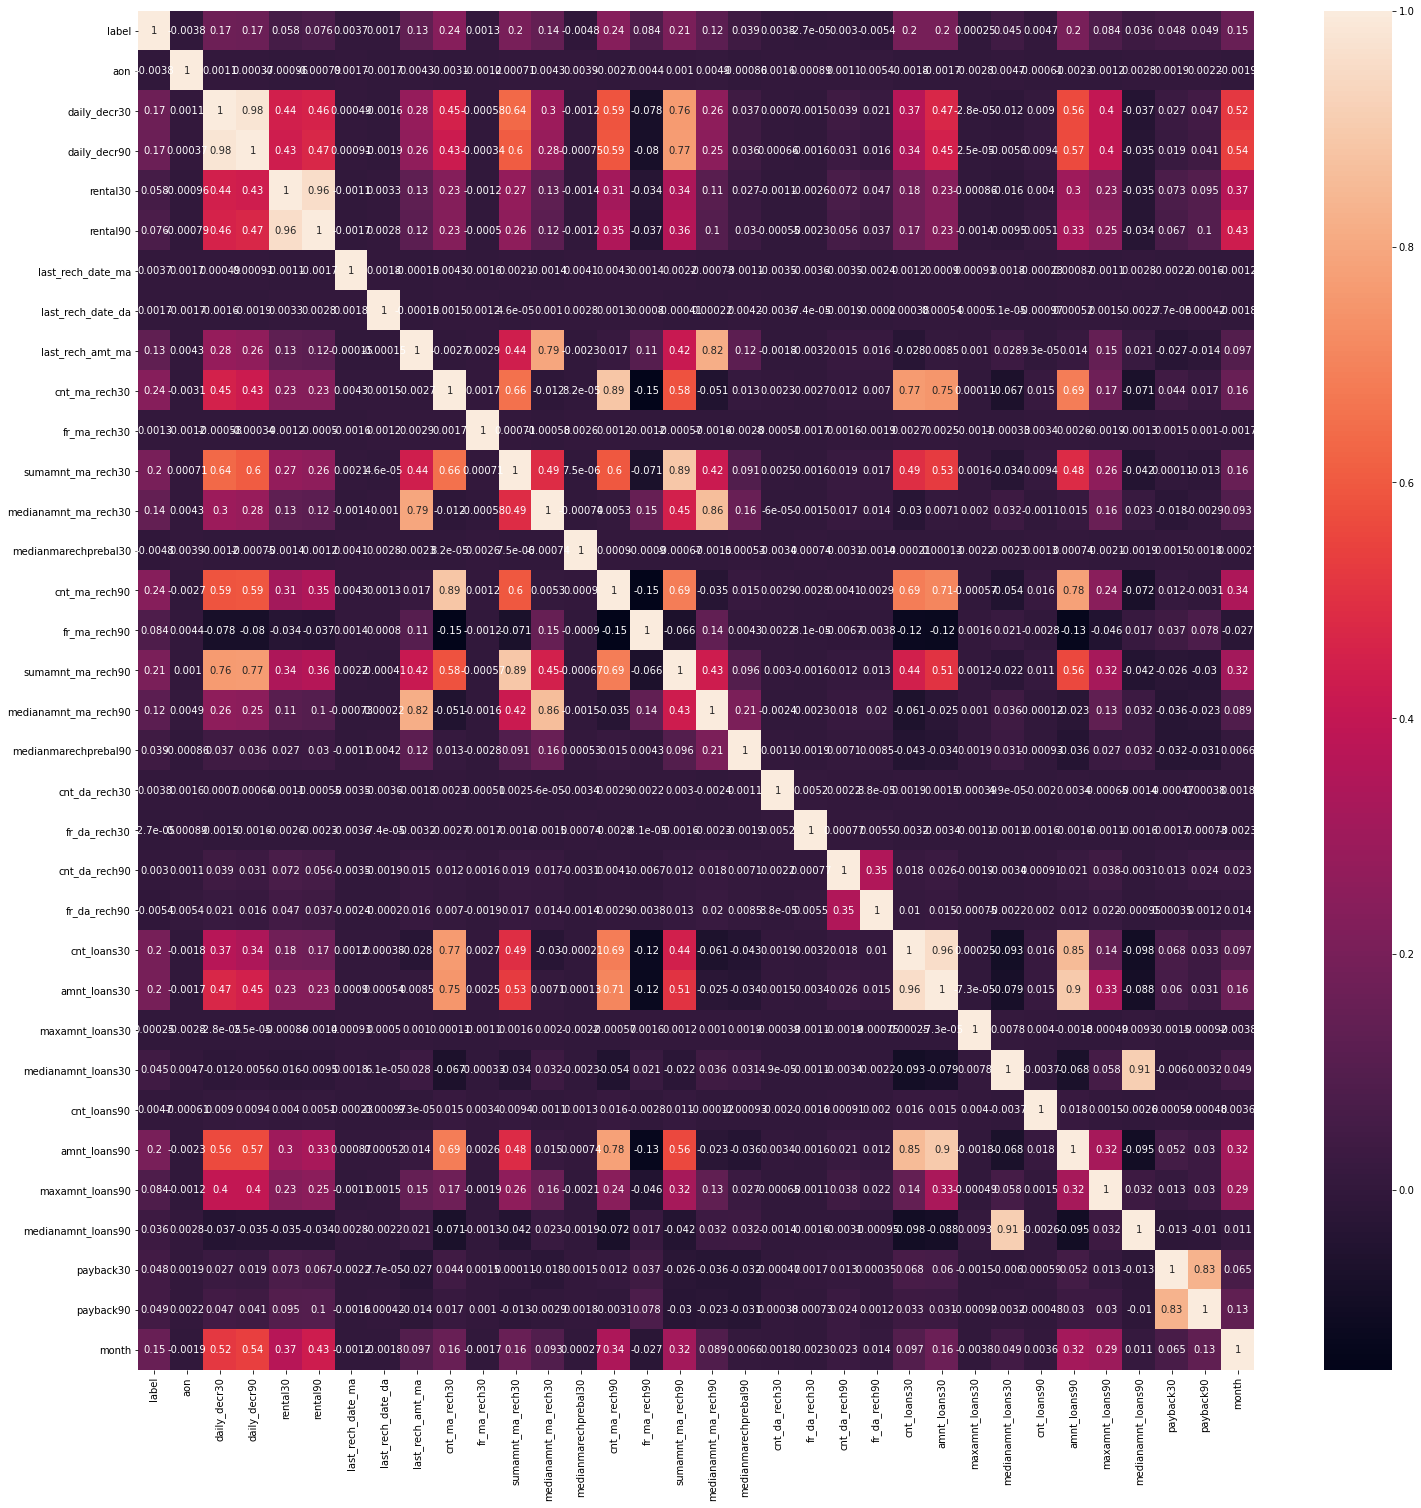

In [28]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(),annot=True)

#### Observations:
- From the above heatmap we observe that many of the independent variables are highly correlated with each other. This will definitely cause multicollinearity problem and affect the performance of the model.
- We see that all the features are positively correlated with the target variable but the correlation is not that strong. 
- We need to deal with the mullticollinearity problem. 

In [29]:
# function to calculate variance_inflation_factor, as we have observed mullticollinearity problem. 
def calculate_vif(dataset):
    vif=pd.DataFrame()
    vif["Features"]=dataset.columns
    vif["VIF_value"]=[variance_inflation_factor(dataset.values,i) for i in range(dataset.shape[1])]
    
    return vif

- Variance inflation factor (VIF) is a measure of the amount of multicollinearity in a set of multiple regression variables. This ratio is calculated for each independent variable. A high VIF indicates that the associated independent variable is highly collinear with the other variables in the model.

In [30]:
# Calling the function excluding target variable
features=df.iloc[:,1:]
calculate_vif(features)

Features  VIF_value
0                    aon   1.011536
1           daily_decr30  38.957028
2           daily_decr90  41.977488
3               rental30  18.268922
4               rental90  18.876349
5      last_rech_date_ma   1.004955
6      last_rech_date_da   1.004919
7       last_rech_amt_ma   6.033267
8          cnt_ma_rech30  28.093231
9           fr_ma_rech30   1.004930
10     sumamnt_ma_rech30  20.041479
11  medianamnt_ma_rech30   8.964861
12  medianmarechprebal30   1.005190
13         cnt_ma_rech90  28.941066
14          fr_ma_rech90   1.467587
15     sumamnt_ma_rech90  23.375445
16  medianamnt_ma_rech90  10.152016
17  medianmarechprebal90   1.131543
18         cnt_da_rech30   1.004115
19          fr_da_rech30   1.004954
20         cnt_da_rech90   1.159568
21          fr_da_rech90   1.142604
22           cnt_loans30  49.131972
23          amnt_loans30  60.331295
24       maxamnt_loans30   1.004296
25    medianamnt_loans30   6.384630
26           cnt_loans90   1.007203
27          amnt_loans90  19.442247
28       maxamnt_loans90  20.834031
29    medianamnt_loans90   6.328686
30             payback30   3.751997
31             payback90   3.897514
32                 month  21.239657

- From the heatmap and above variance inflation factor score we can say many of the features are highly corelated with each other and we can remove one of the highly correlated variables.

In [31]:
# Deleting one of the Highly Correlated features
df.drop(['daily_decr30','rental30','cnt_ma_rech30','sumamnt_ma_rech30','medianamnt_ma_rech30','amnt_loans30','payback30'],axis=1,inplace=True)

In [32]:
#removing outliers
from scipy.stats import zscore
z=np.abs(zscore(df[["aon","last_rech_date_ma","last_rech_date_da","fr_ma_rech30","medianmarechprebal30","medianmarechprebal90","cnt_da_rech30","fr_da_rech30","maxamnt_loans30","cnt_loans90","payback90"]]))
df_new=df[(z<3).all(axis=1)]

### Percentage of data loss:

In [33]:
# checking percentage of data loss
data_loss=(df.shape[0]-df_new.shape[0])/df.shape[0]*100
print("{:.2f}".format(data_loss),"%")

7.00 %


- There is 7% of data loss with the outlier removal. To some extent outliers are removed

### Creating X an Y Split

In [34]:
# Splitting data into X and Y
x=df_new.drop(columns=["label"],axis=1)
y=df_new["label"]

In [35]:
x.head()

aon  daily_decr90  rental90  last_rech_date_ma  last_rech_date_da  \
0  272.0   3065.150000    260.13                2.0                0.0   
1  712.0  12124.750000   3691.26               20.0                0.0   
2  535.0   1398.000000    900.13                3.0                0.0   
3  241.0     21.228000    159.42               41.0                0.0   
4  947.0    150.619333   1098.90                4.0                0.0   

   last_rech_amt_ma  fr_ma_rech30  medianmarechprebal30  cnt_ma_rech90  \
0              1539          21.0                  7.50              2   
1              5787           0.0                 61.04              1   
2              1539           0.0                 66.32              1   
3               947           0.0                  0.00              1   
4              2309           2.0                 29.00              8   

   fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  \
0            21               3078                1539.0   
1             0               5787                5787.0   
2             0               1539                1539.0   
3             0                947                 947.0   
4             2              23496                2888.0   

   medianmarechprebal90  cnt_da_rech30  fr_da_rech30  cnt_da_rech90  \
0                  7.50            0.0           0.0              0   
1                 61.04            0.0           0.0              0   
2                 66.32            0.0           0.0              0   
3                  2.50            0.0           0.0              0   
4                 35.00            0.0           0.0              0   

   fr_da_rech90  cnt_loans30  maxamnt_loans30  medianamnt_loans30  \
0             0            2              6.0                 0.0   
1             0            1             12.0                 0.0   
2             0            1              6.0                 0.0   
3             0            2              6.0                 0.0   
4             0            7              6.0                 0.0   

   cnt_loans90  amnt_loans90  maxamnt_loans90  medianamnt_loans90  payback90  \
0          2.0            12                6                 0.0  29.000000   
1          1.0            12               12                 0.0   0.000000   
2          1.0             6                6                 0.0   0.000000   
3          2.0            12                6                 0.0   0.000000   
4          7.0            42                6                 0.0   2.333333   

   month  
0      7  
1      8  
2      8  
3      6  
4      6

### Checking and Removing Skewness

In [36]:
# skewness before removing outliers
df.skew()

label                   -2.270254
aon                     10.392949
daily_decr90             4.252565
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
fr_ma_rech30            14.772833
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans90          1.678304
medianamnt_loans90       4.895720
payback90                6.899951
month                    0.343242
dtype: float64

- This is the skewness before removing outliers.

In [37]:
# skewness after removing outliers
x.skew()

aon                      0.947640
daily_decr90             4.202157
rental90                 4.437687
last_rech_date_ma        3.124548
last_rech_date_da        9.788552
last_rech_amt_ma         3.717509
fr_ma_rech30             2.034144
medianmarechprebal30    34.329753
cnt_ma_rech90            2.976639
fr_ma_rech90             2.294779
sumamnt_ma_rech90        4.846477
medianamnt_ma_rech90     3.706324
medianmarechprebal90     3.590648
cnt_da_rech30           51.504675
fr_da_rech30            30.826761
cnt_da_rech90           27.841801
fr_da_rech90            29.379201
cnt_loans30              2.680700
maxamnt_loans30         53.482695
medianamnt_loans30       4.586841
cnt_loans90              2.962928
amnt_loans90             3.109029
maxamnt_loans90          1.690285
medianamnt_loans90       4.950794
payback90                2.752248
month                    0.350927
dtype: float64

- After removing outliers, Skewness is also reduced but not completely. 

In [38]:
from sklearn.preprocessing import PowerTransformer

In [39]:
# Power Transformation to remove skewness
PT=PowerTransformer()
data_PT=PT.fit_transform(x)
x=pd.DataFrame(data_PT,columns=x.columns)

In [40]:
x.skew()

aon                      0.303296
daily_decr90            -7.232957
rental90                -1.203649
last_rech_date_ma        0.108959
last_rech_date_da      -55.165119
last_rech_amt_ma        -0.072036
fr_ma_rech30             0.138127
medianmarechprebal30     4.360153
cnt_ma_rech90           -0.003629
fr_ma_rech90             0.146325
sumamnt_ma_rech90       -0.204540
medianamnt_ma_rech90    -0.057549
medianmarechprebal90     0.962106
cnt_da_rech30            8.061213
fr_da_rech30            19.609776
cnt_da_rech90            6.093865
fr_da_rech90            15.474433
cnt_loans30              0.040208
maxamnt_loans30         -0.267744
medianamnt_loans30       3.487756
cnt_loans90              0.100526
amnt_loans90            -0.007513
maxamnt_loans90          0.361987
medianamnt_loans90       3.830257
payback90                0.194805
month                    0.079644
dtype: float64

- The skewness is almost removed. There are few features for which the skewness is way too high and its not getting removed by any method.

In [41]:
# checking if there is any null value after removing skewness
x.isnull().sum()

aon                     0
daily_decr90            0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
fr_ma_rech30            0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback90               0
month                   0
dtype: int64

- Great! No null values! 

### Treating Imbalanced Data

In [42]:
# Doing over sampling
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x,y=SM.fit_resample(x,y)

In [43]:
# checking value counts for target variable after balancing data
y.value_counts()

1    170631
0    170631
Name: label, dtype: int64

- Now, our dataset variable is balanced.

### Scaling

- There is a difference between the range of values for many independent variables. Hence, we are scaling.

In [44]:
# Scaling using MinMaxScaler
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
x_scaled=SS.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns)

In [45]:
x.head()

aon  daily_decr90  rental90  last_rech_date_ma  last_rech_date_da  \
0 -0.612966      0.613926 -0.516809          -0.411324          -0.113072   
1  0.356989      1.408344  0.275370           1.219274          -0.113072   
2  0.000947      0.265700 -0.340338          -0.300183          -0.113072   
3 -0.696226     -0.789504 -0.549323           2.773203          -0.113072   
4  0.787542     -0.427425 -0.290734          -0.194169          -0.113072   

   last_rech_amt_ma  fr_ma_rech30  medianmarechprebal30  cnt_ma_rech90  \
0          0.349974      2.003202             -0.280917      -0.155517   
1          1.605744     -0.836476              0.135306      -0.589900   
2          0.349974     -0.836476              0.170530      -0.589900   
3          0.018548     -0.836476             -0.368786      -0.589900   
4          0.674129      0.463091             -0.094885       1.041074   

   fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  \
0      1.542574          -0.009367              0.393691   
1     -0.914933           0.320400              1.743454   
2     -0.914933          -0.308001              0.393691   
3     -0.914933          -0.484042              0.042742   
4      0.198018           1.309690              0.953392   

   medianmarechprebal90  cnt_da_rech30  fr_da_rech30  cnt_da_rech90  \
0             -0.380284      -0.117373     -0.051422      -0.149202   
1              0.134732      -0.117373     -0.051422      -0.149202   
2              0.179989      -0.117373     -0.051422      -0.149202   
3             -0.442479      -0.117373     -0.051422      -0.149202   
4             -0.098715      -0.117373     -0.051422      -0.149202   

   fr_da_rech90  cnt_loans30  maxamnt_loans30  medianamnt_loans30  \
0     -0.067528     0.307092        -0.134595           -0.237839   
1     -0.067528    -0.716608         2.032992           -0.237839   
2     -0.067528    -0.716608        -0.134595           -0.237839   
3     -0.067528     0.307092        -0.134595           -0.237839   
4     -0.067528     2.033381        -0.134595           -0.237839   

   cnt_loans90  amnt_loans90  maxamnt_loans90  medianamnt_loans90  payback90  \
0     0.124228      0.053822        -0.248163           -0.223633   2.220146   
1    -0.786956      0.053822         2.911616           -0.223633  -0.734634   
2    -0.786956     -0.773221        -0.248163           -0.223633  -0.734634   
3     0.124228      0.053822        -0.248163           -0.223633  -0.734634   
4     1.651985      1.530593        -0.248163           -0.223633   0.765439   

      month  
0  0.614099  
1  1.776013  
2  1.776013  
3 -1.043066  
4 -1.043066

- Now, all the features values are scaled and the model building will not be biased.

## Building the Model

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn import metrics

### Finding Best Random_State

In [47]:
from sklearn.linear_model import LogisticRegression
maxAcc=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    mod=LogisticRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc > maxAcc:
        maxAcc=acc
        maxRS=i
        
print("Best Accuracy is ",maxAcc," on Random State ",maxRS)

Best Accuracy is  0.7774348255013235  on Random State  133


- Using the best Random State to create new train_test_split.

In [48]:
#here we going to split data in traing set and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [49]:
#Importing the packages to build models
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

#### 1. LogisticRegression

In [50]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
pred=LR.predict(x_test)
class_report=classification_report(y_test,pred)
cm=confusion_matrix(y_test,pred)
acc=accuracy_score(y_test,pred)*100
print("Confusion Matrix\n",cm,"\n")
print("Accuracy Score:",acc)
print(class_report)

Confusion Matrix
 [[40491 10797]
 [11989 39102]] 

Accuracy Score: 77.74348255013234
              precision    recall  f1-score   support

           0       0.77      0.79      0.78     51288
           1       0.78      0.77      0.77     51091

    accuracy                           0.78    102379
   macro avg       0.78      0.78      0.78    102379
weighted avg       0.78      0.78      0.78    102379



#### 2. RandomForestClassifier

In [51]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
pred=RFC.predict(x_test)
class_report=classification_report(y_test,pred)
cm=confusion_matrix(y_test,pred)
acc=accuracy_score(y_test,pred)*100
print("Confusion Matrix\n",cm,"\n")
print("Accuracy Score:",acc)
print(class_report)

Confusion Matrix
 [[48806  2482]
 [ 3115 47976]] 

Accuracy Score: 94.53305853739536
              precision    recall  f1-score   support

           0       0.94      0.95      0.95     51288
           1       0.95      0.94      0.94     51091

    accuracy                           0.95    102379
   macro avg       0.95      0.95      0.95    102379
weighted avg       0.95      0.95      0.95    102379



#### 3. DecisionTreeClassifier

In [52]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
pred=DTC.predict(x_test)
class_report=classification_report(y_test,pred)
cm=confusion_matrix(y_test,pred)
acc=accuracy_score(y_test,pred)*100
print("Confusion Matrix\n",cm,"\n")
print("Accuracy Score:",acc)
print(class_report)

Confusion Matrix
 [[46476  4812]
 [ 5687 45404]] 

Accuracy Score: 89.74496722960762
              precision    recall  f1-score   support

           0       0.89      0.91      0.90     51288
           1       0.90      0.89      0.90     51091

    accuracy                           0.90    102379
   macro avg       0.90      0.90      0.90    102379
weighted avg       0.90      0.90      0.90    102379



#### 4. AdaBoostClassifier

In [53]:
AD=AdaBoostClassifier()
AD.fit(x_train,y_train)
pred=AD.predict(x_test)
class_report=classification_report(y_test,pred)
cm=confusion_matrix(y_test,pred)
acc=accuracy_score(y_test,pred)*100
print("Confusion Matrix\n",cm,"\n")
print("Accuracy Score:",acc)
print(class_report)

Confusion Matrix
 [[44234  7054]
 [ 9123 41968]] 

Accuracy Score: 84.19890797917542
              precision    recall  f1-score   support

           0       0.83      0.86      0.85     51288
           1       0.86      0.82      0.84     51091

    accuracy                           0.84    102379
   macro avg       0.84      0.84      0.84    102379
weighted avg       0.84      0.84      0.84    102379



- Here, we observe that RandomForestClassifier is giving the highest accuracy score of 95%. But we all know, it may or may not be due to overfitting, we are not sure about this. So we cannot confirm it as the best model. To be sure about the best model, we will go for the Cross Validation Score.

### Cross Validation Score

In [54]:
# importing cross validation module
from sklearn.model_selection import cross_val_score

In [55]:
print(cross_val_score(LR,x,y,cv=5).mean()) #cross validation score for LogisticRegression

0.7736929475805617


In [56]:
print(cross_val_score(RFC,x,y,cv=5).mean()) #cross validation score for RandomForestClassifier

0.9447405512524665


In [57]:
print(cross_val_score(DTC,x,y,cv=5).mean()) #cross validation score for RandomForestClassifier

0.8969414996324332


In [58]:
print(cross_val_score(AD,x,y,cv=5).mean()) #cross validation score for AdaBoostClassifier

0.8396892137487791


- Here we observe that after doing cross validation RandomForestClassifier is giving the least difference. We can definitely consider it as our best model.

## Hyper Parameter Tuning

- Now, let's apply Hyper Paramter Tuning on the best model to improve the accuracy score.

In [59]:
# importing GridSearchCV module
from sklearn.model_selection import GridSearchCV

In [60]:
parameters={'criterion':['gini','entropy'],
          'max_depth':[4,5,6,7,8,9]}

In [61]:
GCVRFC=GridSearchCV(RandomForestClassifier(),parameters,cv=5)
GCVRFC.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9]})

In [62]:
GCVRFC.best_params_

{'criterion': 'gini', 'max_depth': 9}

In [63]:
Final_ModRFC=RandomForestClassifier(criterion='gini',max_depth=9)
Final_ModRFC.fit(x_train,y_train)
pred=Final_ModRFC.predict(x_test)
acc=accuracy_score(y_test,pred)
acc

0.8535246486095781

- After Hyper Parameter tuning, the improved score of the best model RandomForestClassifier is 85.35%

### Plotting AUC_ROC curve

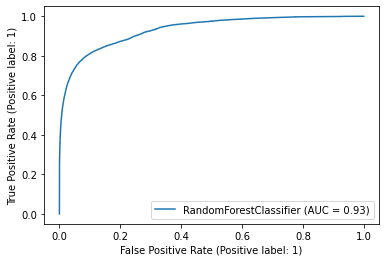

In [64]:
metrics.plot_roc_curve(Final_ModRFC, x_test, y_test)

- The AUC score is 0.93

## Saving the Model

In [65]:
import joblib
joblib.dump(Final_ModRFC,"Credit_Model.pkl")

['Credit_Model.pkl']